In [1]:
#import all the libraries needed 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#define your dataset 
df = pd.read_csv('Alzheimers_dataset.csv')

df

,Data as of,Sex,Race/Ethnicity,Age group,Year,MMWRWeek,Analysis Period Start Date,Analysis Period End Date,AllCause,NaturalCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,08/04/2020,Female (F),Hispanic,0-4 years,2020,27,01/01/2020,07/04/2020,1104,1035,...,0,9,0,8,2,125,17,5,6,3
1,08/04/2020,Female (F),Hispanic,5-14 years,2020,27,01/01/2020,07/04/2020,272,167,...,0,9,2,7,0,18,9,6,1,1
2,08/04/2020,Female (F),Hispanic,15-24 years,2020,27,01/01/2020,07/04/2020,826,356,...,0,13,9,5,0,82,28,16,27,24
3,08/04/2020,Female (F),Hispanic,25-34 years,2020,27,01/01/2020,07/04/2020,1425,891,...,0,29,14,12,13,178,64,27,99,92
4,08/04/2020,Female (F),Hispanic,35-44 years,2020,27,01/01/2020,07/04/2020,2234,1807,...,1,51,22,18,24,171,168,53,233,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,08/04/2020,Male (M),Other,45-54 years,2020,27,01/01/2020,07/04/2020,812,651,...,0,14,9,9,9,87,166,34,71,65
116,08/04/2020,Male (M),Other,55-64 years,2020,27,01/01/2020,07/04/2020,1719,1544,...,2,33,49,15,34,112,416,63,199,185
117,08/04/2020,Male (M),Other,65-74 years,2020,27,01/01/2020,07/04/2020,1963,1871,...,8,52,99,31,16,58,523,58,319,303
118,08/04/2020,Male (M),Other,75-84 years,2020,27,01/01/2020,07/04/2020,1523,1488,...,46,27,85,30,28,33,364,71,277,259


These are all the information that you can get from this data
1.Total deaths
2.Men vs women
3.Cause of death
4.Race/ethnicity
5.Correlation Between Causes of Death

Enter the number that is assigned:1


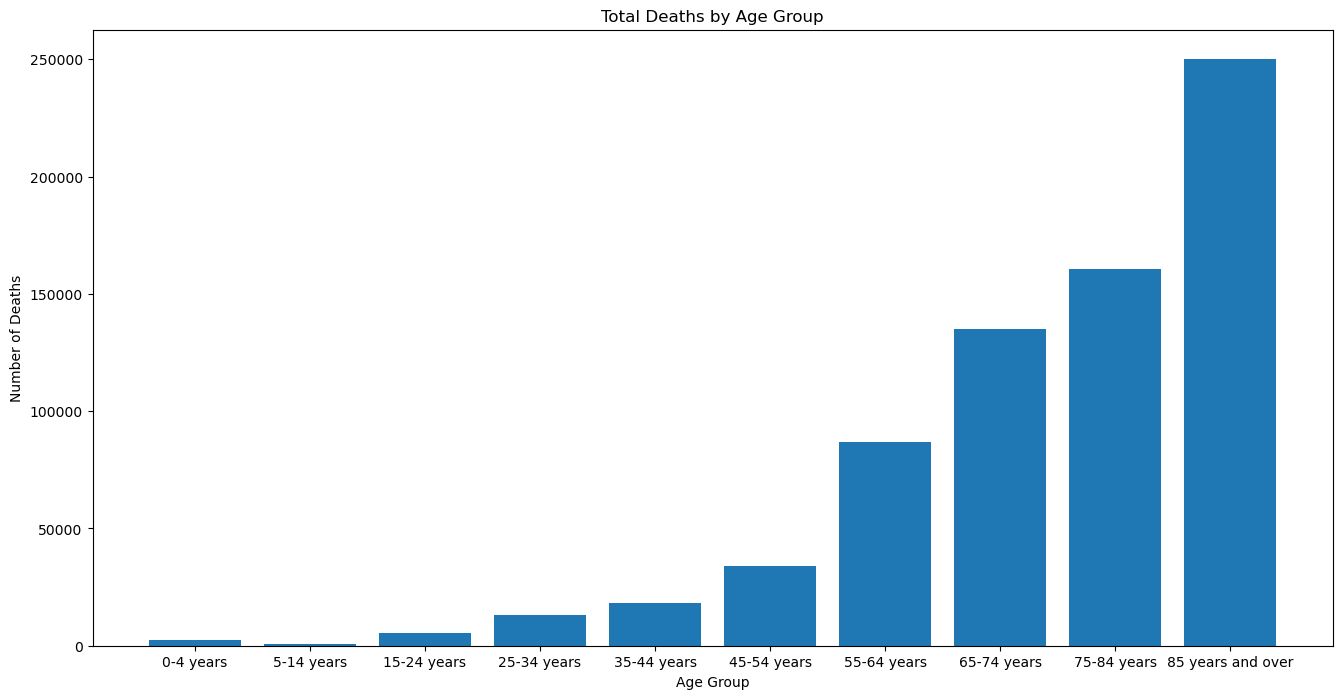

Would you like to explore more? (yes/no): yes
These are all the information that you can get from this data
1.Total deaths
2.Men vs women
3.Cause of death
4.Race/ethnicity
5.Correlation Between Causes of Death

Enter the number that is assigned:2


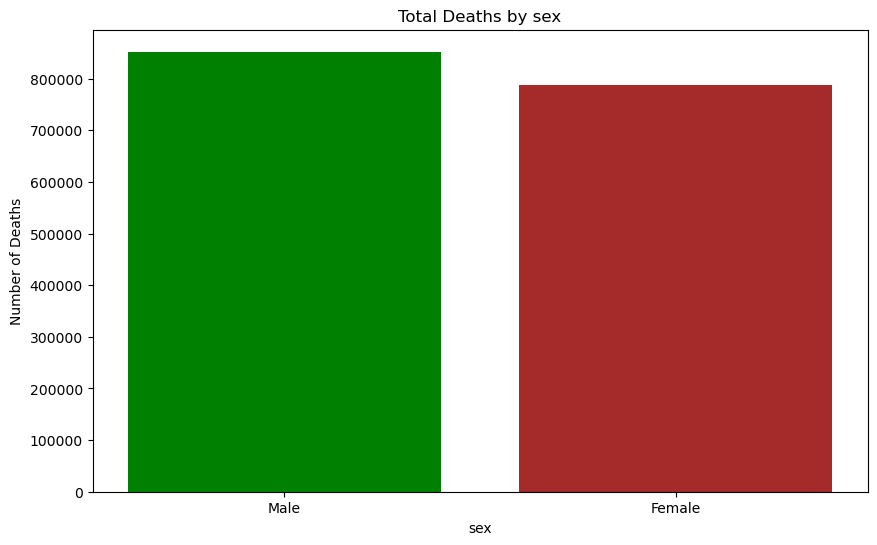

In [ ]:
#create a function extract and visualize that uses a data based on a given query  
def extract_and_visualize(data, query):

    #check if the query is '1'
    if query.lower() == '1':

        plt.figure(figsize=(16, 8))
        
        #extract data from the dataframe 
        age_groups = data['Age group']
        all_cause_deaths = data['AllCause']
        
        #create a bar plot using extracted data
        plt.bar(age_groups, all_cause_deaths)
        
        #set plot title, x-axis label and y-axis label 
        plt.title('Total Deaths by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Number of Deaths')

        #display the plot 
        plt.show()

    #check if the query is '2'
    elif query.lower() == '2':
        
        plt.figure(figsize=(10, 6))
        
        #extract data from the data frame 
        male_data = data[data['Sex'] == 'Male (M)']
        female_data = data[data['Sex'] == 'Female (F)']
        
        #calculate the total deaths for male and female 
        male_total_deaths = male_data['AllCause'].sum()
        female_total_deaths = female_data['AllCause'].sum()
        
        #create a bar plot for total deaths by gender, using different colors for male and female bars
        plt.bar(['Male', 'Female'], [male_total_deaths, female_total_deaths], color=['green', 'brown'])

        #set plot title, x-axis label and y-axis label 
        plt.title('Total Deaths by sex')
        plt.xlabel('sex')
        plt.ylabel('Number of Deaths')

        #display the plot 
        plt.show()

    #check if the query is '3'        
    elif query.lower() == '3':
        
        #exxtract the causes of death from the columns of the dataframe 
        causes = data.columns[11: ]  
        
        #calculate the total deaths for each cause and sort them in ascending order 
        cause_deaths = data[causes].sum().sort_values(ascending=True) 

        plt.figure(figsize=(12, 8))
        
        #create a bar plot for total deaths by cause of death 
        cause_deaths.plot(kind='bar')
                          
        #set plt title, x-axsis and y-axsis
        plt.title('Total Deaths by Cause of Death')
        plt.xlabel('Cause of Death')
        plt.ylabel('Number of Deaths')

        #display the plot 
        plt.show()

    # Check if the query is '4'
    elif query.lower() == '4':

        # Calculate total deaths by race/ethnicity and sort the values in ascending order
        race_deaths = data.groupby('Race/Ethnicity')['AllCause'].sum().sort_values(ascending=True)

        plt.figure(figsize=(12, 8))

        # Define a color palette for each race
        color_palette = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

        # Create a bar plot for total deaths by race/ethnicity, assigning different colors to each race
        plt.bar(race_deaths.index, race_deaths, color=color_palette)

        # Set plot title, x-axis label, and y-axis label
        plt.title('Total Deaths by Race/Ethnicity')
        plt.xlabel('Race/Ethnicity')
        plt.ylabel('Number of Deaths')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')

        # Display the plot
        plt.show()

    #check if the query is '5'
    elif query.lower() == '5':
        
        #extract causes of death columns from the DataFrame
        causes_of_death = df.columns[9:]
        
        #calculate the correlation matrix for causes of death
        correlation_matrix = df[causes_of_death].corr()

        plt.figure(figsize=(12, 8))
        
        #create a heatmap using Seaborn to visualize the correlation matrix
        sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
        
        #set plot title
        plt.title('Correlation Between Causes of Death')

        #display the plot 
        plt.show()

#define the main function 
def main(): 
    
    #start an infinite loop to interact with the user 
    while True: 
        
        #prompt the user to choose a query option 
        user_query = input("These are all the information that you can get from this data\n1.Total deaths\n2.Men vs women\n3.Cause of death\n4.Race/ethnicity\n5.Correlation Between Causes of Death\n\nEnter the number that is assigned:") 
        
        #check if the user input is not a valid query option
        if user_query.lower() not in ['1', '2', '3', '4', '5']: 
            print("Invalid query. Please enter a valid query.") 
            
            #restart the loop if the input is invalid 
            continue 
        
        #call the extract the extract_and_visualize function
        extract_and_visualize(df, user_query)
        
        # Ask the user if they want to explore more
        user_input = input("Would you like to explore more? (yes/no): ")
        
         #define valid input options
        x = ['yes', 'no']
        
        
        #start another loop to handle user input for exploration continuation
        while user_input not in x:
        
            print("Invalid input. Please enter 'yes' or 'no'.")
            user_input = input("Would you like to explore more? (yes/no): ")
         
        # Check the user's response and break the loop if they choose not to explore further
        if user_input.lower() == 'no':
            print('I hope the information that was provided was useful!')
            break
        
        # If the user wants to explore more, continue to the next iteration of the loop
        elif user_input.lower() == 'yes':
            continue

main()